TEMPERATURE PREDICTION USING ARIMA

In [94]:
import pandas as pd
import numpy as np

In [50]:
df=pd.read_csv('/content/dataexport_20220728T153013.csv')

In [51]:
df.head(10)

,location,Basel
0,lat,47.54694
1,lon,7.56892
2,asl,283.697
3,variable,Temperature
4,unit,°F
5,level,2 m elevation corrected
6,resolution,hourly
7,aggregation,None
8,timestamp,Basel Temperature [2 m elevation corrected]
9,20220101T0000,49.47895


In [52]:
newdf=df.drop(df.index[[0,1,2,3,4,5,6,7,8]])

In [53]:
newdf.columns=['Timestamp','Hourly temp']

In [54]:
newdf=newdf.reset_index()

In [55]:
newdf.drop('index',inplace=True,axis=1)

In [56]:
newdf.head()

,Timestamp,Hourly temp
0,20220101T0000,49.47895
1,20220101T0100,48.542953
2,20220101T0200,48.308952
3,20220101T0300,48.02095
4,20220101T0400,47.732952


In [57]:
#ADF Test to check id data is stationary or not
series=newdf['Hourly temp'].astype(float)
from statsmodels.tsa.stattools import adfuller
result = adfuller(series)
print('ADF Statistic on the entire dataset: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the entire dataset: -2.5840860510863055
p-value: 0.0963311657152725
Critical Values:
	1%: -3.4318653292515395
	5%: -2.8622095883960235
	10%: -2.567126426709739


In [58]:
! pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(newdf['Hourly temp'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14576.837, Time=15.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18391.649, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15140.290, Time=0.68 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16243.562, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18389.654, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15130.612, Time=2.95 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14655.967, Time=10.98 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15035.827, Time=7.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14311.197, Time=12.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15118.415, Time=1.98 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=15086.023, Time=4.55 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=14177.189, Time=12.78 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=15097.632, Time=3.85 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=14242.201, Time=14.27 sec
 ARIMA(2,1,5)(

In [60]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Timestamp    4344 non-null   object
 1   Hourly temp  4344 non-null   object
dtypes: object(2)
memory usage: 68.0+ KB


In [61]:
#train test split
print(newdf.shape)
train=newdf.iloc[0:1448]
test=newdf.iloc[1448:2896]
print(train.shape,test.shape)

(4344, 2)
(1448, 2) (1448, 2)


In [67]:
#fitting data to model
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Hourly temp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Hourly temp   No. Observations:                 1448
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -2314.573
Date:                Thu, 28 Jul 2022   AIC                           4645.147
Time:                        15:37:47   BIC                           4687.370
Sample:                             0   HQIC                          4660.904
                               - 1448                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6322      0.853     47.638      0.000      38.960      42.304
ar.L1          0.8890      0.016     54.935      0.000       0.857       0.921
ma.L1          0.6648      0.018     37.350      0.000       0.630       0.700
ma.L2          0.4655      0.030     15.401      0.000       0.406       0.525
ma.L3          0.3712      0.029     12.725      0.000       0.314       0.428
ma.L4          0.3006      0.032      9.493      0.000       0.239       0.363
ma.L5          0.1309      0.030      4.299      0.000       0.071       0.191
sigma2         1.4279      0.029     48.690      0.000       1.370       1.485
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              1944.12
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.37
Prob(H) (two-sided):                  0.91   Kurtosis:                         8.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Timestamp    120 non-null    object
 1   Hourly temp  120 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [63]:
#conerting timestamp and temp data to datetime and float type
train['Timestamp']= pd.to_datetime(train['Timestamp'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
test['Timestamp']= pd.to_datetime(test['Timestamp'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
train['Hourly temp']=train['Hourly temp'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
test['Hourly temp']=test['Hourly temp'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    120 non-null    datetime64[ns]
 1   Hourly temp  120 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [83]:
print(train.shape[0])
print(test.shape[0])

1448
1448


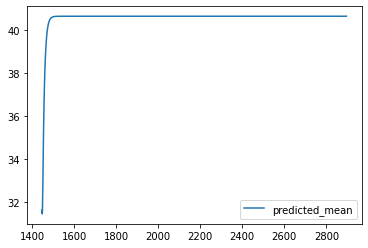

In [107]:
#plotting prediction
import matplotlib.pyplot as plt
from datetime import datetime
start=len(test)
end=len(test)+len(train)-1
pred=model.predict(start=start, end=end)
pred.plot(legend=True)

In [87]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Mean of test set",test['Hourly temp'].mean())
rmse=sqrt(mean_squared_error(pred,test['Hourly temp']))
print("RMSE:",rmse)

Mean of test set 50.488107225828735
RMSE: 13.905082227272064


In [93]:
# newdf['Hourly temp']=newdf['Hourly temp'].astype(float)
# df_log=np.sqrt(newdf['Hourly temp'])
# df_diff=df_log.diff().dropna()
# series=newdf['Hourly temp'].astype(float)
# from statsmodels.tsa.stattools import adfuller
# result = adfuller(df_log)
# print('ADF Statistic on the entire dataset: {}'.format(result[0]))
# print('p-value: {}'.format(result[1]))
# print('Critical Values:')
# for key, value in result[4].items():
#     print('\t{}: {}'.format(key, value))

ADF Statistic on the entire dataset: -2.6151237586238243
p-value: 0.08991160664418169
Critical Values:
	1%: -3.4318653292515395
	5%: -2.8622095883960235
	10%: -2.567126426709739


In [97]:
# from datetime import datetime
# start_index = datetime(2022, 1 ,1)
# end_index = datetime(2022, 6, 30)


In [102]:
# train=train.set_index(train['Timestamp'])
# test=test.set_index(test['Timestamp'])